In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'D:\\NUS\\GitHub\\BT4222_GrpProject'

In [3]:
data = pd.read_csv("./Output/data_clean&processed.csv")

In [4]:
data.sample(3)

,Unnamed: 0,backers_count,blurb,category,converted_pledged_amount,country,created_at,current_currency,deadline,fx_rate,...,backers_count_log,goal_log,pledged_log,duration_log,n_comments_log,num_faq_bool,avg_fund_per_backer,comments_afinn,blurb_name,faq_comments
872,887,1,Troop Life is an interactive online community ...,"{'id': 361, 'name': 'Web', 'slug': 'journalism...",58,US,2017-02-10 12:13,USD,2017-03-17 15:03,1.000000,...,-1.390561,1.735923,-0.844212,-0.012145,-0.710711,0,58.000000,-1.0,Troop Life is an interactive online community ...,[' ']No comments yet.
632,638,118,Re-stock of the most desired Bretonian team in...,"{'id': 34, 'name': 'Tabletop Games', 'slug': '...",11448,ES,2020-10-06 14:07,USD,2020-10-27 3:43,1.212209,...,0.846693,0.107232,0.769842,-1.780581,1.479805,0,82.076271,23.0,Re-stock of the most desired Bretonian team in...,[' ']Andrew Creedy\nabout 1 month ago\nGreet...
276,276,48,A retelling of the classic Greek myth by C.K. ...,"{'id': 22, 'name': 'Illustration', 'slug': 'ar...",8663,US,2020-09-04 12:41,USD,2020-11-01 18:00,1.000000,...,0.360855,0.246284,0.734559,0.072745,-0.710711,0,180.479167,-1.0,A retelling of the classic Greek myth by C.K. ...,[' ']No comments yet.


In [5]:
data.columns

Index(['Unnamed: 0', 'backers_count', 'blurb', 'category',
       'converted_pledged_amount', 'country', 'created_at', 'current_currency',
       'deadline', 'fx_rate', 'goal', 'id', 'launched_at', 'location', 'name',
       'pledged', 'profile', 'slug', 'source_url', 'spotlight', 'staff_pick',
       'state', 'state_changed_at', 'static_usd_rate', 'urls', 'usd_pledged',
       'usd_type', 'story', 'faq', 'num_faq', 'comments', 'n_comments',
       'duration', 'parent_category', 'category_name', 'location_name',
       'month_launched', 'year_launched', 'backers_count_log', 'goal_log',
       'pledged_log', 'duration_log', 'n_comments_log', 'num_faq_bool',
       'avg_fund_per_backer', 'comments_afinn', 'blurb_name', 'faq_comments'],
      dtype='object')

In [6]:
data.isna().sum()

Unnamed: 0                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
current_currency            0
deadline                    0
fx_rate                     0
goal                        0
id                          0
launched_at                 0
location                    0
name                        0
pledged                     0
profile                     0
slug                        0
source_url                  0
spotlight                   0
staff_pick                  0
state                       0
state_changed_at            0
static_usd_rate             0
urls                        0
usd_pledged                 0
usd_type                    0
story                       0
faq                         0
num_faq                     0
comments                    0
n_comments                  0
duration                    0
parent_cat

### Clean Data

In [6]:
import json
category_dict = data.category.map(lambda x: json.loads(x))
data[["category_name"]] = category_dict.map(lambda x: x.get('parent_name'))
data = data.drop("category", axis=1)

In [7]:
data[["category_name"]].head()

,category_name
0,Technology
1,Food
2,Art
3,Photography
4,Publishing


In [8]:
data[["duration_days"]] = data["duration"].map(lambda x: x.split(' ')[0])
data = data.drop("duration", axis=1)

In [9]:
data[["duration_days"]].head()

,duration_days
0,30
1,30
2,29
3,30
4,30


In [10]:
data.columns

Index(['backers_count', 'converted_pledged_amount', 'country', 'created_at',
       'current_currency', 'deadline', 'fx_rate', 'goal', 'id', 'launched_at',
       'location', 'pledged', 'profile', 'slug', 'source_url', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'urls',
       'usd_pledged', 'usd_type', 'story', 'num_faq', 'n_comments',
       'title_blurb', 'comments_clean', 'faq_clean', 'comment_sentiment',
       'comment_afinn', 'category_name', 'duration_days'],
      dtype='object')

### Check for variables with high correlations with each other

In [11]:
data_corr = data[['backers_count', 'converted_pledged_amount', 'country',
        'current_currency', 'fx_rate', 'goal',
       'pledged',
       'spotlight', 'staff_pick', 'state',
       'usd_pledged', 'usd_type', 
       'num_faq', 'n_comments', 'comment_sentiment', 'comment_afinn', 'category_name',
       'duration_days']]

In [12]:
data_corr.head()

,backers_count,converted_pledged_amount,country,current_currency,fx_rate,goal,pledged,spotlight,staff_pick,state,usd_pledged,usd_type,num_faq,n_comments,comment_sentiment,comment_afinn,category_name,duration_days
0,1,1,ES,USD,1.212886,15000,1.0,False,False,0,1.136930,domestic,0,0,0.000000,-1.0,Technology,30
1,2,9,NZ,USD,0.723585,5000,15.0,False,False,0,9.829555,domestic,0,0,0.000000,-1.0,Food,30
2,0,0,US,USD,1.000000,10000,0.0,False,False,0,0.000000,domestic,0,0,0.000000,-1.0,Art,29
3,0,0,US,USD,1.000000,2000,0.0,False,False,0,0.000000,domestic,0,0,0.000000,-1.0,Photography,30
4,10,340,US,USD,1.000000,2500,340.0,False,False,0,340.000000,international,0,1,0.140625,2.0,Publishing,30


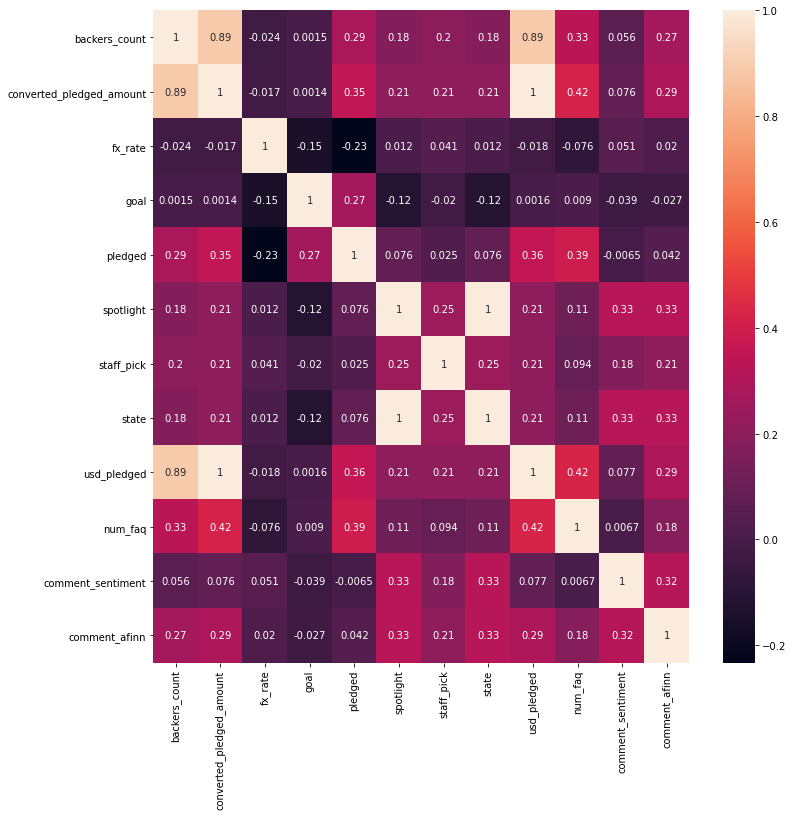

In [13]:
plt.figure(figsize=(12,12))

corrMatrix = data_corr.corr()
sns.heatmap(corrMatrix, annot=True)

plt.show()

#### 1) Keep converted pledge amt (drop usd_pledge)

In [14]:
data_new = data.drop(["usd_pledged"], axis=1)

#### 2) Check state and spotlight reason for high corr

In [15]:
data[data["spotlight"]==0].state.value_counts()

0    367
Name: state, dtype: int64

In [16]:
data[data["spotlight"]==1].state.value_counts()

1    633
Name: state, dtype: int64

##### This shows that all project having spotlight will be successful, while those without will not be successful. Hence we cannot use spotlight as a variable. 

In [17]:
data_new = data_new.drop(["spotlight"], axis=1) 

#### 3) Converted pledge amt and backers count has a high correlation (0.89). More investors = more money. Combine these two features into avg amt per backer.

In [18]:
data_new[["amt_per_backer"]] = data_new["converted_pledged_amount"] / data_new["backers_count"]

In [19]:
data_new[["amt_per_backer"]].head()

,amt_per_backer
0,1.0
1,4.5
2,NaN
3,NaN
4,34.0


In [20]:
# convert NAN to 0
data_new[["amt_per_backer"]] = data_new[["amt_per_backer"]].fillna(0).round(2)

In [21]:
data_new[["amt_per_backer"]].head(10)

,amt_per_backer
0,1.00
1,4.50
2,0.00
3,0.00
4,34.00
5,37.21
6,35.66
7,26.10
8,41.50
9,16.67


In [22]:
# drop backers and amt pledge
data_new = data_new.drop(["converted_pledged_amount","backers_count"], axis=1) 

In [23]:
data_new.head()

,country,created_at,current_currency,deadline,fx_rate,goal,id,launched_at,location,pledged,...,num_faq,n_comments,title_blurb,comments_clean,faq_clean,comment_sentiment,comment_afinn,category_name,duration_days,amt_per_backer
0,ES,2015-08-18 21:01,USD,2016-07-09 20:11,1.212886,15000,1662798399,2016-06-09 20:11,"{""id"":55897673,""name"":""Mexico"",""slug"":""mexico-...",1.0,...,0,0,Save water 100% liquid downloads in toilets at...,No comments yet.,No faq,0.000000,-1.0,Technology,30,1.0
1,NZ,2015-08-11 18:04,USD,2015-09-11 15:55,0.723585,5000,1316288919,2015-08-12 15:55,"{""id"":22726370,""name"":""Flat Bush"",""slug"":""flat...",15.0,...,0,0,Ormiston Primary Community Garden.We at Ormist...,No comments yet.,No faq,0.000000,-1.0,Food,30,4.5
2,US,2015-04-28 21:14,USD,2015-05-28 21:14,1.000000,10000,818890122,2015-04-29 20:57,"{""id"":2428184,""name"":""Jackson"",""slug"":""jackson...",0.0,...,0,0,"Aspiring metalsmith in need of better tools, a...",No comments yet.,No faq,0.000000,-1.0,Art,29,0.0
3,US,2014-07-07 1:30,USD,2014-10-26 0:00,1.000000,2000,1934517401,2014-09-26 0:00,"{""id"":2357536,""name"":""Austin"",""slug"":""austin-t...",0.0,...,0,0,Beauty At Any Age.So many women believe they a...,No comments yet.,No faq,0.000000,-1.0,Photography,30,0.0
4,US,2014-11-04 16:30,USD,2014-12-09 9:20,1.000000,2500,1449353867,2014-11-09 9:20,"{""id"":2380358,""name"":""Cincinnati"",""slug"":""cinc...",340.0,...,0,1,Shrieks and Shivers from the Horror Zine.The H...,Paula Limbaugh. over 6 years ago. So sorry yo...,No faq,0.140625,2.0,Publishing,30,34.0


In [24]:
data_new.columns

Index(['country', 'created_at', 'current_currency', 'deadline', 'fx_rate',
       'goal', 'id', 'launched_at', 'location', 'pledged', 'profile', 'slug',
       'source_url', 'staff_pick', 'state', 'state_changed_at',
       'static_usd_rate', 'urls', 'usd_type', 'story', 'num_faq', 'n_comments',
       'title_blurb', 'comments_clean', 'faq_clean', 'comment_sentiment',
       'comment_afinn', 'category_name', 'duration_days', 'amt_per_backer'],
      dtype='object')